In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

**Задание 1.**

Используя тестовые данные для решения задач по теме «Однофакторная линейная
регрессия» или данные, смоделированные Вами для двух признаков, выполните следующее:
1. Постройте на графике облако точек;
2. Найдите коэффициенты линейной регрессии;
3. Совместите на графике линию регрессии с облаком точек;
4. Оцените визуально характер зависимости признаков.
5. Сделайте выводы.

In [2]:
n_samples = 300
X = np.linspace(-1, 2, n_samples).reshape(-1, 1)
y = X * 3 + np.random.randn(n_samples).reshape(-1, 1) 
X.shape, y.shape

((300, 1), (300, 1))

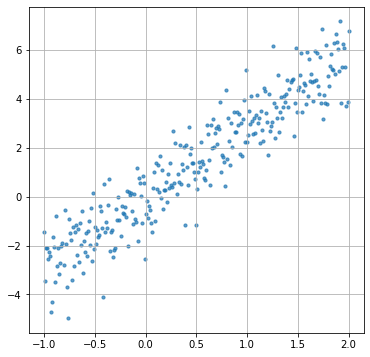

In [5]:
plt.figure(figsize = (6, 6)) # размер картинки
plt.scatter(x = X, y = y, s = 10, alpha = 0.7) # точки учебного набора
plt.grid()
plt.show()

In [6]:
model = LinearRegression().fit(X, y)

In [23]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8422867773208316


In [24]:
y_pred = model.predict(X)

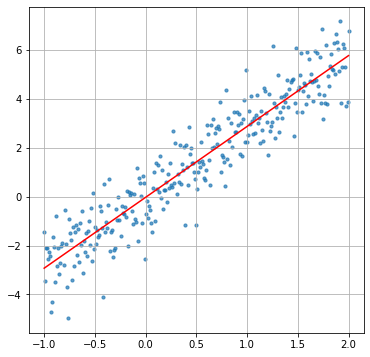

In [13]:
plt.figure(figsize=(6, 6)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(X, model.intercept_ + X * model.coef_, c='r') 
plt.grid()
plt.show()

In [10]:
print('b0 = {}, b1 = {}'.format(model.intercept_[0], model.coef_[0][0]))

b0 = -0.03240166275240641, b1 = 2.893509210598391


Как видно из рисунка, есть основания полагать, что между признаками наблюдается
положительная линейная зависимость. Для нахождения коэффициентов линейной регрессии воспользуемся свойством  coef_ для нахождения коэффициентов этой зависимости. 

линейная зависимость существует, и найденное уравнение регрессии может использоваться для целей прогноза.

**Задание 2.**

Подберите реальные данные для задачи однофакторной линейной регрессии. Выполните
следующее:
1. Постройте на графике облако точек.
2. Найдите уравнение регрессии. (Укажите численные значения коэффициентов регрессии)
3. Совместите уравнение регрессии с облаком точек.
4. Сделайте выводы относительно зависимости исследуемых признаков.
5. Выберите произвольно несколько значений независимого признака x и вычислите ожидаемые (согласно полученному уравнению регрессии) значения признака y.
6. Покажите на графике точки, соответствующие сделанному прогнозу.
7. Оформите отчёт. Включите в отчёт построенный график, запишите численно коэффициенты регрессии, коэффициент корреляции, значение критерия Стьюдента, расчётные значения прогнозируемого признака. Обоснуйте выводы относительно зависимости признаков и качества прогноза.

In [180]:
from sklearn import datasets
from sklearn.datasets import load_boston

In [14]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [187]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [188]:
df_target = pd.DataFrame(target)
df_target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [15]:
one_data = data[:, -1]

LSTAT    % lower status of the population

MEDV     Median value of owner-occupied homes in $1000's

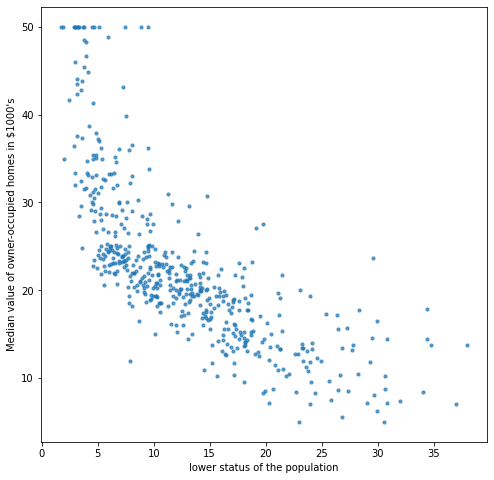

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(one_data, target,s=10,alpha=0.7)
plt.xlabel('lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

In [23]:
model = LinearRegression().fit(one_data.reshape(-1, 1), target)

In [24]:
print('b0 = {}, b1 = {}'.format(model.intercept_, model.coef_[0]))

b0 = 34.5538408793831, b1 = -0.9500493537579905


In [192]:
model.coef_

array([-0.95004935])

In [207]:
model.intercept_

34.5538408793831

In [193]:
y_pred = model.predict(one_data.reshape(-1, 1))

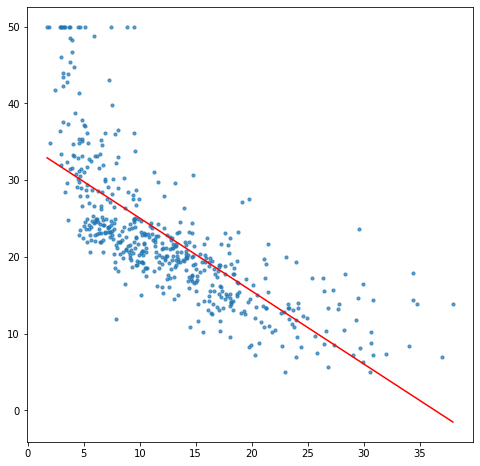

In [26]:
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=one_data,y=target,s=10,alpha=0.7) # точки учебного набора
x = np.linspace(min(one_data), max(one_data), 2)
plt.plot(x, model.intercept_ + x * model.coef_, c='r') 
plt.show()

Зависимость не особо линейная

In [28]:
x_test = np.random.choice(one_data, 10, replace=False)
y_test = model.predict(x_test.reshape(-1, 1))

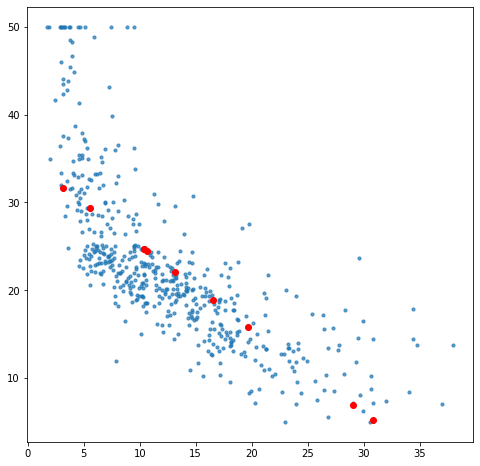

In [29]:
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=one_data,y=target,s=10,alpha=0.7) # точки учебного набора
x = np.linspace(min(one_data), max(one_data), 2)
# plt.plot(x, model.intercept_ + x * model.coef_, c='r') 
plt.scatter(x_test, y_test, c='r') 
plt.show()

In [197]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [199]:
r = np.correlate(one_data,target)
r

array([119799.159])

In [ ]:
# Сначала найдём объём выборки n
n=length(dlina)
# Вычислим и выведем значение T-критерия
t=r/sqrt(1-r^2)*sqrt(n-2)
t

In [240]:
mean_x, mean_y = np.mean(one_data), np.mean(target)
n = one_data.shape[0]
cov_xy = np.cov(one_data, target)[0, 1]
var_x = sum((item - mean_x)**2 for item in one_data) / (n - 1)
var_y = sum((item - mean_y)**2 for item in target) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

-0.7376627261740145

In [32]:
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(one_data, target)
r = rvalue

In [34]:
t = r / np.sqrt(1 - r ** 2) * np.sqrt(one_data.shape[0] - 2)

In [36]:
print('Коэффициенты регрессии: b0 = {}, b1 = {}\nкоэффициент корреляции: r = {}\nзначение критерия Стьюдента: t = {}'.format(model.intercept_, model.coef_[0], r, t))

Коэффициенты регрессии: b0 = 34.5538408793831, b1 = -0.9500493537579905
коэффициент корреляции: r = -0.737662726174015
значение критерия Стьюдента: t = -24.527899851187737


Поскольку наблюдаемое значение критерия Стьюдента (-24.5278998511877) сильно отличается от нуля, что мало вероятно, если считать, что наша гипотеза о независимости признаков верна (т.е. ρ=0), у нас есть основания полагать, что гипотеза 𝐻0: 𝜌 = 0 ложна (т.е. на самом деле 𝜌 ≠ 0, а значит, существует линейная зависимость между признаками). 

Итак, наша гипотеза об отсутствии зависимости между признаками не подтвердилась, а значит, линейная зависимость существует, и найденное
уравнение регрессии может использоваться для целей прогноза. 

In [114]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [115]:
data = dataset['data']
target = dataset['target'].reshape((442, 1))
columns = dataset['feature_names']
columns.append('tg')
df = pd.DataFrame(np.hstack([data, target]), columns = columns)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,tg
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Text(0, 0.5, 'a quantitative measure of disease progression one year after baseline')

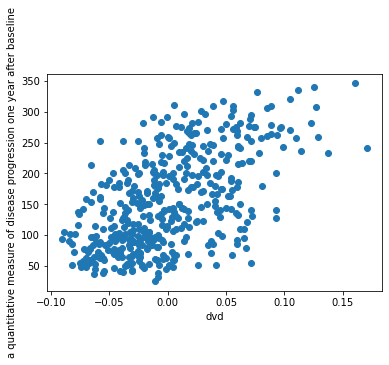

In [133]:
one_data = data[:, 2]
plt.scatter(one_data, target)
plt.xlabel('dvd')
plt.ylabel('a quantitative measure of disease progression one year after baseline')

In [117]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1